<a href="https://colab.research.google.com/github/Ghalia671/MODULE1/blob/master/Ghalia_projet_ml2_pr%C3%A9diction_de_cat%C3%A9gorie_de_revenu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction



L'objectif de ce test est d'évaluer vos compétences data science sur un cas pratique. Le plan d'analyse suggéré est le suivant. Néanmoins, vous êtes libre de faire des analyses supplémentaires. Il n'est pas nécessaire de tout faire, mais la qualité du code de ce qui est fait est un critère important.


* Import des données et nettoyage
    * Structure des données, type de variables
    * Résumé statistique
    * Données manquantes
* Analyse descriptive
    * Tests statistiques
    * Corrélation
    * Visualisation
* Modélisation
    * Définition de la problématique
    * Packages utilisés
    * Validation des méthodes
    * Evaluation de la performance
    * Comparaison des modèles
* Conclusions
    * Utilisation des résultats des modèles
    * Application business et les éléments

Vous pouvez utiliser les données dont le lien est: https://dataks.bitbucket.io/ml/income_class.csv

L'objectif est de prédire la catégorie de revenu la variable cible est `income`.

In [24]:
#Import des données et nettoyage
import pandas as pd
import numpy as np

inc=pd.read_csv("https://dataks.bitbucket.io/ml/income_class.csv",na_values=np.NaN)
inc = inc.replace(to_replace='Female', value=1, regex=True)
inc = inc.replace(to_replace='Male', value=0, regex=True)
inc = inc.replace(to_replace='<=50K', value=0, regex=True)
inc = inc.replace(to_replace='>50K', value=1, regex=True)
inc = inc.replace('?',np.NaN)
#len(inc) - inc.count()
inc = inc.dropna(axis=0, how='any')
len(inc) - inc.count()
inc.head(3)




,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,1,0,4356,18,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,1,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,1,0,3900,40,United-States,0


In [104]:
from sklearn.model_selection import train_test_split

X = inc[['age','education.num',
        'sex','capital.gain','capital.loss','hours.per.week']]

y = inc['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   sex             30162 non-null  int64 
 9   capital.gain    30162 non-null  int64 
 10  capital.loss    30162 non-null  int64 
 11  hours.per.week  30162 non-null  int64 
 12  native.country  30162 non-null  object
 13  income          30162 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 3.5+ MB
None
Description DF :
                 age        fnlwgt  ...  hours.per.week        income
count  30162.000000  3.016200e+04  ...    301

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f246e026c50>,
      dtype=object)

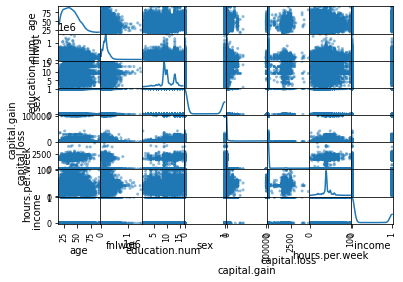

In [53]:
#Analyse descriptive

import matplotlib.pyplot as plt

print(inc.info())
print("Description DF :\n",inc.describe())

pd.plotting.scatter_matrix(inc, diagonal='kde')


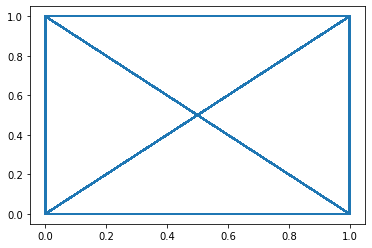

In [96]:
#Modélisation
#On va utiliser la régression logistique car la prédiction est catégorique, et parce que il s'agit de faire des prédictions sur une variable cible que j'ai transformé en 0 et 1

import numpy as np
from sklearn.linear_model import LogisticRegression
#y=y.astype('int')

clf = LogisticRegression(max_iter=1200,penalty='none')
clf.fit(X.iloc[:, :2],y)
clf.score(X.iloc[:, :2],y)
pred = clf.predict(X.iloc[:, :2])

from sklearn.datasets import make_classification
import matplotlib.pyplot as plt


plt.plot(pred,y)
plt.show()

In [91]:
import numpy as np
from matplotlib.colors import ListedColormap
def visualisation_predictions(clf, X, y, X_test, y_test, title, subplot, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X.iloc[:, 0].min()
    x_max = X.iloc[:, 0].max()
    y_min = X.iloc[:, 1].min()
    y_max = X.iloc[:, 1].max()
    
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))

    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)

    if plot_decision_regions:
        subplot.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    subplot.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    subplot.set_xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    subplot.set_ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        subplot.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    subplot.set_title(title)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        subplot.legend(loc=0, handles=legend_handles)



ValueError: ignored

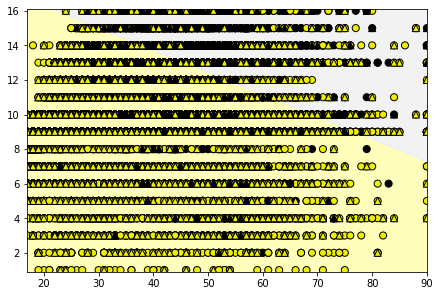

In [100]:
fig1, ax2 = plt.subplots(constrained_layout=True)
visualisation_predictions(clf, X, y, X_test, y_test, 'Regression Logistique Multiple',ax2)

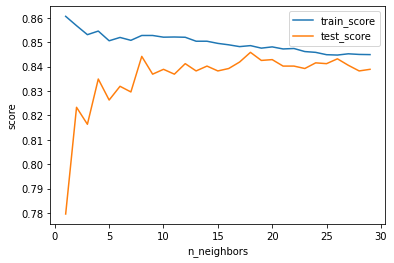

In [107]:
#Modélisation
#On va utiliser la KNN car les variables explicatives sont catégoriques et donc on peut détecter un pattern en utilisant KNN


from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
            test_size=0.1, random_state=0)

clf = KNeighborsClassifier(n_neighbors = 5)
clf = clf.fit(X_train, y_train)

rows = []

for nnei in range(1,30):
    clf = KNeighborsClassifier(n_neighbors = nnei)
    clf = clf.fit(X_train, y_train)
    rows.append([nnei,clf.score(X_train, y_train), clf.score(X_test, y_test)])
res_scores = pd.DataFrame(rows, columns=["n_neighbors","train_score", "test_score"])

res_scores.plot(kind="line",x="n_neighbors",y="train_score")
plt.plot(res_scores["n_neighbors"],res_scores["test_score"], label = "test_score")
plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.legend()
plt.show()

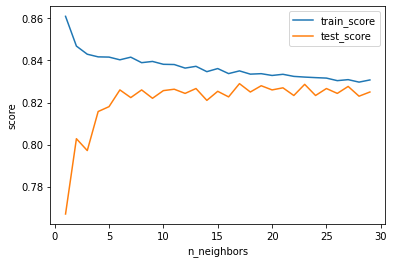

In [109]:
# On va faire la normalisation

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
            test_size=0.1, random_state=0)

scaler = MinMaxScaler()
#scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rows = []

for nnei in range(1,30):
    clf = KNeighborsClassifier(n_neighbors = nnei)
    clf = clf.fit(X_train, y_train)
    rows.append([nnei,clf.score(X_train, y_train), clf.score(X_test, y_test)])


res_scores = pd.DataFrame(rows, columns=["n_neighbors","train_score", "test_score"])

res_scores.plot(kind="line",x="n_neighbors",y="train_score")

plt.plot(res_scores["n_neighbors"],res_scores["test_score"], label = "test_score")

plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.legend()
plt.show()

In [111]:
clf.score(X_train, y_train)

0.8307238902191932

In [112]:
clf.score(X_test, y_test)

0.8249917136228041

    n_neighbors  train_score  test_score
0             1     0.860969    0.764004
1             2     0.846823    0.802784
2             3     0.842255    0.794166
3             4     0.841149    0.814717
4             5     0.840744    0.817037
5             6     0.840449    0.826318
6             7     0.840744    0.821014
7             8     0.838497    0.827312
8             9     0.838644    0.819357
9            10     0.837576    0.824660
10           11     0.836839    0.826318
11           12     0.835624    0.824329
12           13     0.835845    0.824329
13           14     0.833671    0.822009
14           15     0.834666    0.824329
15           16     0.833229    0.824660
16           17     0.833966    0.826649
17           18     0.832529    0.824992
18           19     0.832566    0.826980
19           20     0.832345    0.822672
20           21     0.832529    0.825986
21           22     0.831424    0.823666
22           23     0.831461    0.825323
23           24 

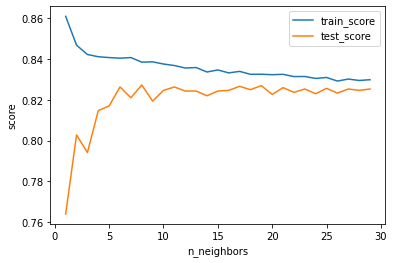

In [113]:
rows = []

for nnei in range(1,30):
    clf = KNeighborsClassifier(n_neighbors = nnei,p=nnei)
    clf = clf.fit(X_train, y_train)
    rows.append([nnei,clf.score(X_train, y_train), clf.score(X_test, y_test)])


res_scores = pd.DataFrame(rows, columns=["n_neighbors","train_score", "test_score"])
print(res_scores)

res_scores.plot(kind="line",x="n_neighbors",y="train_score")

plt.plot(res_scores["n_neighbors"],res_scores["test_score"], label = "test_score")

plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.legend()
plt.show()

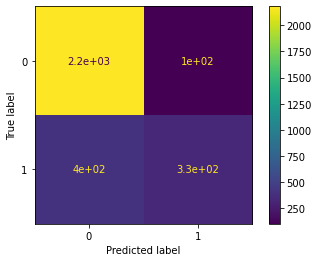

In [114]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC

clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
plot_confusion_matrix(clf, X_test, y_test)
plt.show()

In [116]:
accuracy = 1 - ((400+100)/(2200+100+400+330))
print("accuracy : ",round(accuracy * 100,2)," %")

precision = 330/(330+400)
print("precision : ",round(precision * 100,2)," %")

rappel = 330/(330+400)
print("rappel : ",round(rappel * 100,2)," %")

score_F1 = 2 * ((precision * rappel)/(precision + rappel))
print("score F1 : ",round(score_F1 * 100,2)," %")

accuracy :  83.5  %
precision :  45.21  %
rappel :  45.21  %
score F1 :  45.21  %


In [ ]:
#Conclusion : la performance de mon modèle semble très faible, il y a aussi des lenteurs lors de l'exécution du code dont je n'arrive pas à determiner la cause
# Je conclus aussi que l'analyse doit être encore améliorée, et qu'il y a une grande majorité de personnes qui ont un salaire <=50K d'après les prédictions obtenues
# Cela peut s'appliquer dans une entreprise pour déterminer qui mérite une augmentation et améliorer la parité genre par exemple au niveau des income au sein d'une société